In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
data = pd.read_excel(r"C:\Users\hanke\Desktop\LungCancerRiskData.xlsx", header=0) # ( use r before print data and here header 0 means the 0th is our column

In [3]:
#data['Level']=data['Level'].map({'Low':0, 'Medium':0.5,'High':1}) 
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       Occupational Hazards  Genetic Risk  Chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [4]:
data["Level"].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

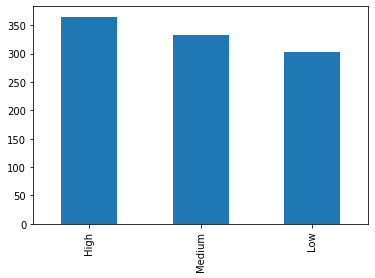

In [5]:
data["Level"].value_counts().plot.bar();

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
Occupational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
Chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [7]:
data.drop("Unnamed", axis=1, inplace=True)

In [8]:
data.drop("Patient ID", axis=1, inplace=True)

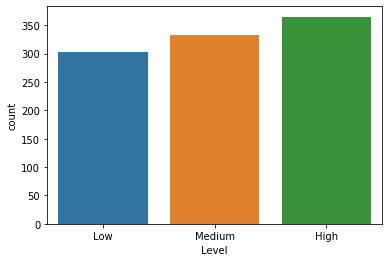

In [9]:
sns.countplot(data['Level'],label="Count")

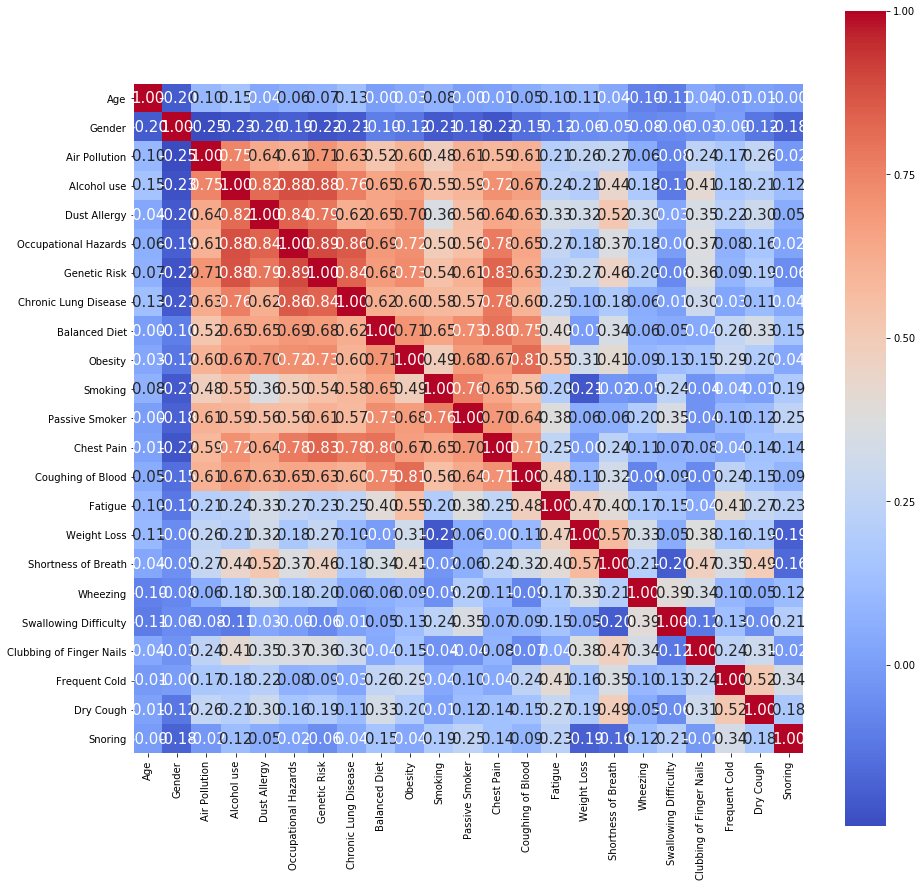

In [10]:
features = list(data.columns[1:24])
corr = data[features].corr() # .corr is used for find corelation
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features,
           cmap= 'coolwarm')

In [11]:
data.shape

(1000, 24)

In [12]:
y = data["Level"]
X = data.drop(['Level'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

C:\Users\hanke\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
y = data["Level"]
X = data.drop(["Level"], axis=1)

In [ ]:
loj  = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()